# 1주차 스터디 과제

Made by 35기 코딩부장 류제현

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 생성과 회귀분석

* 데이터 생성을 이해해보고 직접 만들어보자
* 생성한 데이터의 회귀식을 구해보자


예시: 
$
Y = 2X + 2 \quad (where -3<X<3$)

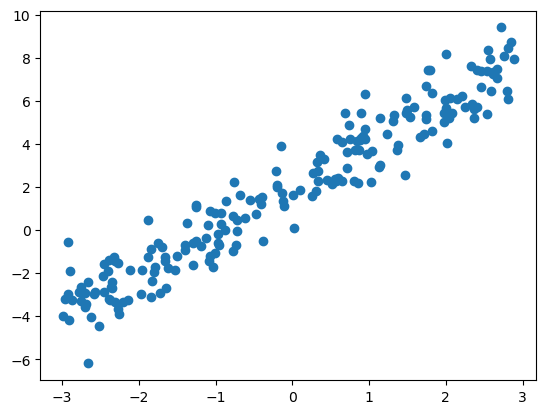

In [2]:
# 몇 개의 데이터를 생성할지 n으로 정한다 (ex. n=100이면 100개의 데이터 생성)
n = 200

# X축의 데이터를 생성한다. np.random.rand은 0과1사이의 랜덤한 값을 리턴한다. 
# -> 여기에 6를 곱하면 0과 6사이의 값으로 변한다(생각해보면 당연함) -> 이 값에다 3를 빼주면 -3와 3사이의 값으로 변한다!
X = 6 * np.random.rand(n,1) - 3

# 각 x값에 해당하는 y값 생성 + 랜덤한 잡음 추가
y = 2*X + 2 + np.random.randn(n,1)

# 그림으로 그려보자
plt.scatter(X,y);

**연습문제 1**

$
Y = 0.5X^2 + X + 2 
$

위 식을 따르면서, uniform 잡음을 추가한 -10<X<10 데이터를 생성 

잡음에 3을 곱해서 무작위성을 키워주세요!

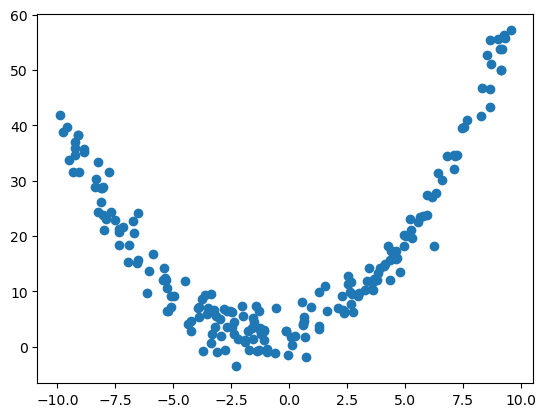

In [3]:
# 연습문제 1 풀이
n = 200
X = 20 * np.random.rand(n,1) - 10
                          # 잡음을 크게 주기 위해서 3을 곱해줌
y = 0.5*X**2 + X + 2 + (3*np.random.randn(n,1))

plt.scatter(X,y);

**연습문제 2**

넘파이를 사용해서 연습문제 1에서 생성한 데이터(X,y)를 사용해서 회귀(Regression)를 해보자

* 2차식을 사용한 회귀를 해야함! (힌트: np.c_[np.ones((n,1)), X, X**2])

In [4]:
#  연습문제 2 풀이
n = 200

# 순서유의
X_b = np.c_[X**2,X, np.ones((n,1))]

theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

theta

array([[0.49614578],
       [0.9916963 ],
       [2.46850539]])

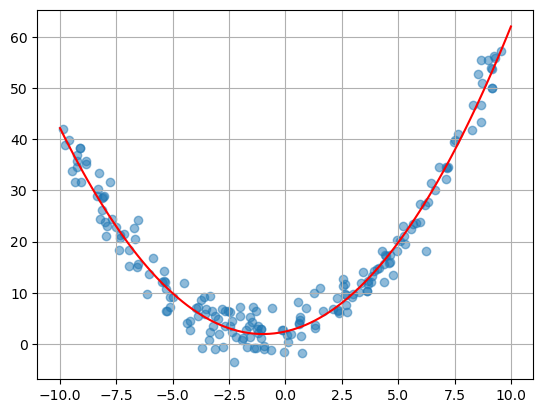

In [5]:
# 연습문제 2 시각화
X2 = np.linspace(-10,10,100)
X2_b = np.c_[X2**2, X2, np.ones((100,1))] # 순서유의

fitted_value = X2_b.dot(theta)

# plot으로 나타내자
plt.scatter(X,y, alpha=0.5)
plt.plot(X2,fitted_value, c='r')
plt.grid();

**연습문제 3**

싸이킷런을 사용해 연습문제 1에서 생성한 데이터(X,y)를 회귀 해보자

힌트) 싸이킷런은 절편을 자동으로 추가 해주기 때문에, np.c_[X,X**2] 를 사용합니다!

In [6]:
# 연습문제 3 풀이

# 데이터 생성
X3_b = np.c_[X,X**2]

from sklearn.linear_model import LinearRegression
# 모델을 만들고
linear_model=LinearRegression()
# fit(학습)해줍니다
linear_model.fit(X3_b,y)

# 회귀계수와 절편 출력
print("회귀계수:", linear_model.coef_, ", 절편:",linear_model.intercept_)

# 예측을 한번 수행해봅시다
sample=np.array([[5.0, 25.0]])
print("예측값:", linear_model.predict(sample)) 

# score의 경우 R^2값을 리턴한다.
linear_model.score(X3_b,y)

회귀계수: [[0.9916963  0.49614578]] , 절편: [2.46850539]
예측값: [[19.83063145]]


0.9652018477353826